## DDA3020 Autumn 2023 Homework 1 

### Programming Part 1：Polynomial Regression

--------------------------------------------------------------------------------------------------------------------------

In this exercise, we will try to fit a non-linear function $g$ with polynomial regression on the feasible space $\mathbf{X} = [0,11]$: 
$$\text{Unknown} \quad g(x) = ?$$ 
$$\text{Construct} \quad f(x) = \sum_{i=0}^n \alpha_i x^i \quad \Longleftrightarrow \quad f(x) = w^Tx',\quad x' = \begin{bmatrix} 1\\x\\x^2\\\vdots\\x^n\end{bmatrix},\quad s.t. \quad \forall x\in \mathbf{X}, \quad f(x) \approx g(x) $$ 
Where $n$ is the polynomial degree of freedom and is manually chosen.

--------------------------------------------------------------------------------------------------------------------------

In [9]:
import numpy as np
import matplotlib.pyplot as plt


We will use 17 noised samples to try to construct $f$.

In [10]:
x = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
y = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])

#### 1. (1 point) 

(1) Define the function to calculate $\hat{w}$ directly from $X$, $y$ and $\lambda$:

$$\hat{w} = \arg\min_{w}\|Xw-y\|^2+\lambda\|w\|^2 \quad \Rightarrow\quad \hat{w} = (X^TX+\lambda I)^{-1}X^Ty$$

   - _Hint_: You are allowed to use _np.linalg.inv_ to calculate the inverse of a matrix.


In [11]:
def estimate_w(X,y,lambda_reg):
    lambda_I = np.multiply(lambda_reg , np.eye(len(X.T)))
    XT_X = np.dot(X.T, X)
    inverse = np.linalg.inv(XT_X + lambda_I)
    w_hat = np.dot(np.dot(inverse, X.T), y)
    return w_hat


#### 2. (3 points)
(1) Take $n = 3$ and $lambda = 0$. Solve the problem.

(2) Display your $\hat{y} = X\hat{w}$ as well as the given $y$. You are supposed to see:

<!-- ![pic1](hw1.png) -->
<img src = 'hw1.png' width = 40% height = 40% />


 - _Hint_: the mean squared error of this solution $\frac{(\hat{y}-y)^2}{17} = 754.55$

Text(0.5, 0, 'x')

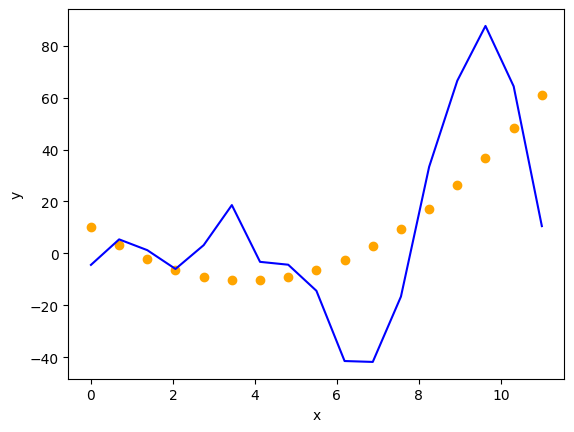

In [12]:
n = 3
lambda_reg = 0.0
def predict_w(n,x,lambda_reg):
    X = []
    for i in range(n+1):
        X.append(x[0]**i)
    X = np.array(X)
    for xi in x[1:]:
        temp = []
        for i in range(n+1):
            temp.append(xi**i)
        temp = np.array(temp)
        X = np.vstack((X,temp))
    w_hat = estimate_w(X,y,lambda_reg)
    return w_hat
def predict(n,x_sample,new_x,lambda_reg):
    w_hat = predict_w(n,x_sample,lambda_reg)
    y_hat = []
    for xi in new_x:
        temp = []
        for i in range(n+1):
            temp.append(xi**i)
        temp = np.array(temp)
        y_hat.append(np.dot(w_hat,temp))
    y_hat = np.array(y_hat)
    return y_hat
y_hat = predict(3,x,x,lambda_reg)
#plt.scatter(x,y,color="blue")
plt.plot(x,y, color="blue", linestyle = 'solid', label='given point')
plt.scatter(x,y_hat,color = 'orange', label = 'estimation of y')
plt.ylabel('y')
plt.xlabel('x')

#### 3. (8 points) 

(1) Implement a grid search by changing the polynomial degree $n$ as well as the regularization parameter $\lambda$

(2) find the best mse (mean squared error) that you can reach. Print your best search mse.

In [13]:
def calculate_mse(y,y_hat):
    mse = np.mean((y - y_hat) ** 2)
    return mse
best = None
n_set = []
lambda_set = []
mse_set = []
for n in range(8,14):
    for lambda_reg in range(58000,62000):
        lambda_reg = lambda_reg/100000000
        n_set.append(n)
        lambda_set.append(np.log(lambda_reg))
        y_hat = predict(n,x,x,lambda_reg)
        mse = calculate_mse(y,y_hat)
        mse_set.append(mse)
        if best == None or mse < best[0]:
            best = [mse,n,lambda_reg]
n_set      = np.array(n_set     )
lambda_set = np.array(lambda_set)
mse_set    = np.array(mse_set   )
print(best)


[20.277403749700213, 11, 0.00060989]


#### 4. (1 point) 

(1) Display in 3D the results of your grid search.

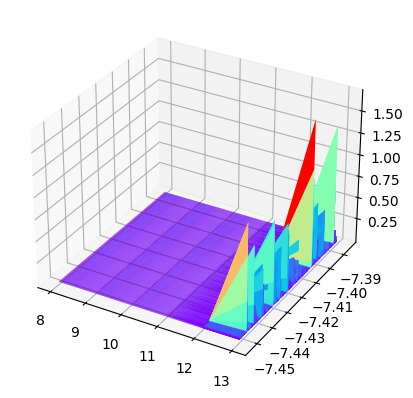

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(n_set, lambda_set,mse_set,cmap='rainbow')
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(n_set, lambda_set,mse_set,c = 'r',s = 1)

#### 5. (1 point) 

(1) Define the function $f$ that you found.


Text(0.5, 0, 'x')

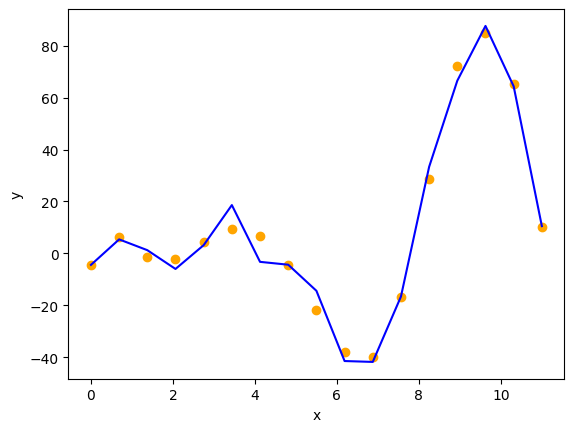

In [15]:
w_hat = predict_w(11,x,0.00060989)
def f(x):
    n = 11
    y_hat = []
    for xi in x:
        temp = []
        for i in range(n+1):
            temp.append(xi**i)
        temp = np.array(temp)
        y_hat.append(np.dot(w_hat,temp))
    y_hat = np.array(y_hat)
    return y_hat
y_hat = f(x)
plt.plot(x,y, color="blue", linestyle = 'solid', label='given point')
plt.scatter(x,y_hat,color = 'orange', label = 'estimation of y')
plt.ylabel('y')
plt.xlabel('x')

#### 5. (6 points) 

(1) Load the 1000 points taken from the ground truth fuction $g$. You will find data on the range $x\in[-5,20]$.

(2) Display for $x\in [0,11]$:
 - Display $g$ in color 'C0' with the points that you loaded.
 - Scatter the given 17 samples in color 'C1'. 
 - Display (enough densely) your $f$ in color 'C2'.
 - Display the legend indicating the 3 plots. Specify the name for axis x and y.

(3) Repeat (2) for $x\in [-1,12]$

(4) Repeat (2) for $x\in [-2,13]$

(5) Give some comments on this work.

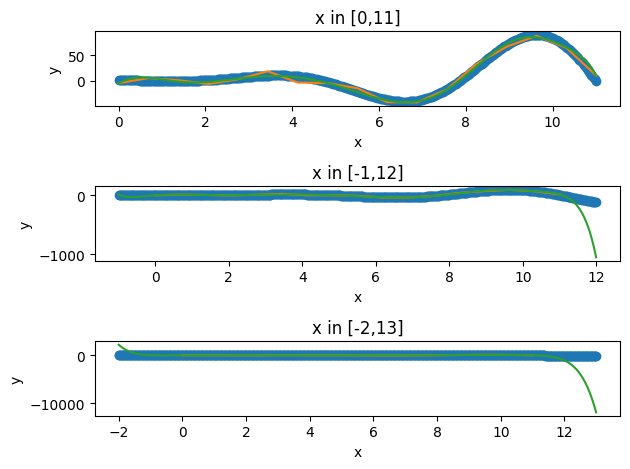

In [16]:
# load
import pickle as pkl
with open('ground truth function', 'rb') as read_file:
    x_real_g, y_real_g = pkl.load(read_file)
    read_file.close()
    fig = plt.figure()
    ax1 = fig.add_subplot(3,1,1)
    ax2 = fig.add_subplot(3,1,2)
    ax3 = fig.add_subplot(3,1,3)


    def remove_plot(n,m,x_real_g,y_real_g):
        list_to_remove = []
        for i in range(len(x_real_g)):
            if x_real_g[i]<n or x_real_g[i]>m:
                list_to_remove.append(i)
                x_new = np.delete(x_real_g, list_to_remove)
                y_new = np.delete(y_real_g, list_to_remove)
        return (x_new,y_new)

    x_real_g1,y_real_g1 = remove_plot(0,11,x_real_g,y_real_g)
    y_real_g3 = f(x_real_g1)
    ax1.scatter(x_real_g1, y_real_g1, color="C0"   , label='given point')
    ax1.plot   (x        , y        , color='C1'   , label='training point')
    ax1.plot   (x_real_g1, y_real_g3, color="C2"   , label='estimation')
    ax1.set_ylabel('y')
    ax1.set_xlabel('x')
    ax1.set_title('x in [0,11]')

    x_real_g1,y_real_g1 = remove_plot(-1,12,x_real_g,y_real_g)
    y_real_g3 = f(x_real_g1)
    ax2.scatter(x_real_g1, y_real_g1, color="C0"   , label='given point')
    ax2.plot   (x        , y        , color='C1'   , label='training point')
    ax2.plot   (x_real_g1, y_real_g3, color="C2"   , label='estimation')
    ax2.set_ylabel('y')
    ax2.set_xlabel('x')
    ax2.set_title('x in [-1,12]')

    x_real_g1,y_real_g1 = remove_plot(-2,13,x_real_g,y_real_g)
    y_real_g3 = f(x_real_g1)
    ax3.scatter(x_real_g1, y_real_g1, color="C0"   , label='given point')
    ax3.plot   (x        , y        , color='C1'   , label='training point')
    ax3.plot   (x_real_g1, y_real_g3, color="C2"   , label='estimation')
    ax3.set_ylabel('y')
    ax3.set_xlabel('x')
    ax3.set_title('x in [-2,13]')
    fig.tight_layout()


comments: It is easy to find out that my model has a great result on the domain that has training datas ([0,11]), but fail to predict y on other domains. So I think there must be some overfitting problems. In machine learning, we also need to get more widely spread datas.